# Introduction


<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7-yxbGEO1ywGcVUdaYPeFCHDqPytniUVhOA&usqp=CAU' width="800" height="800">

Computer Science is the study of computational machines. As a discipline, computer science spans a range of topics.
Computer Science is one of the most popular course in this 21st century. Compared to other discipline the salary package is quiet high. Here, I am analyzing salary package and popularity of different computer science jobs. 

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [2]:
data = pd.read_csv('../input/glassdoor-published-average-pay/finalpay.csv')

In [3]:
#lets look at data
data.head()

,Job,country,Currency_x,Currency_y,CURRENCY,Avg_pay,conversion(1 USD=),Avg_pay(USD),Frequency,Confidence
0,Machine Learning Engineer,Switzerland,CHF,Swiss Franc,CHF,96000.0,0.886038,108347.497511,yr,Very High
1,Machine Learning Engineer,USA,$,US Dollar,USD,114000.0,1.000000,114000.000000,yr,Very High
2,Machine Learning Engineer,Israel,₪,New Israeli Sheqel,ILS,29971.0,3.257195,9201.475503,mo,Very High
3,Machine Learning Engineer,Australia,A$,Australian Dollar,AUD,110000.0,1.320835,83280.652012,yr,Very High
4,Machine Learning Engineer,UK,£,Pound Sterling,GBP,50208.0,0.745766,67324.066798,yr,Very High


In [4]:
# check for null values
data.isna().sum()

Job                     0
country                 0
Currency_x            305
Currency_y            108
CURRENCY              108
Avg_pay               100
conversion(1 USD=)     48
Avg_pay(USD)          136
Frequency             100
Confidence            100
dtype: int64

In [5]:
# get information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job                 624 non-null    object 
 1   country             624 non-null    object 
 2   Currency_x          319 non-null    object 
 3   Currency_y          516 non-null    object 
 4   CURRENCY            516 non-null    object 
 5   Avg_pay             524 non-null    float64
 6   conversion(1 USD=)  576 non-null    float64
 7   Avg_pay(USD)        488 non-null    float64
 8   Frequency           524 non-null    object 
 9   Confidence          524 non-null    object 
dtypes: float64(3), object(7)
memory usage: 48.9+ KB


In [6]:
data.describe()

,Avg_pay,conversion(1 USD=),Avg_pay(USD)
count,5.240000e+02,576.000000,4.880000e+02
mean,3.338549e+06,866.315925,4.799581e+04
std,1.164945e+07,3829.666603,2.891121e+05
min,1.184000e+03,0.745766,5.532862e+00
25%,3.430450e+04,1.204366,1.905647e+03
50%,7.450000e+04,5.789549,2.122632e+04
75%,4.602500e+05,73.141116,5.506889e+04
max,9.006700e+07,23134.500000,6.000000e+06


**Dropping some unnecessary columns**

In [7]:
columns_to_drop = ['Currency_x','Currency_y', 'CURRENCY']
data.drop(columns_to_drop, axis = 1, inplace = True)

**Renaming columns**

In [8]:
# Renaming columns
data.rename(columns = {"conversion(1 USD=)":'Conversion Rate', 'Avg_pay(USD)': 'USA_avg_pay'}, inplace = True)

## Selecting specific countries and job for our analysis

In [9]:
# selecting  countries
selected_countries = ['USA','UK','India','Australia','Canada','Germany','Russia','China','France','Switzerland',
                      'South Korea','Japan','Italy','Ireland']
mask = data.country.isin(selected_countries)
data = data[mask]

In [10]:
# selecting particular jobs
selected_jobs = ['Machine Learning Engineer','Data Scientist','Software Engineer','Data Analyst','Research Scientist'
                ,'Data Engineer','Database Administrator','Project Manager',
                 'Business Analyst','Product Manager']
mask = data.Job.isin(selected_jobs)
data = data[mask]

In [11]:
# renaming value of Frequency column
data.loc[(data.Frequency == '\xa0yr'),'Frequency'] = 'yearly'
data.loc[(data.Frequency == '\xa0mo'),'Frequency'] = 'monthly'

In [12]:
# changing monthly salary to  average annual pay by multiplying by 12
mask = data.Frequency == 'monthly'

data[mask]['USA_avg_pay'] = 12 * data.USA_avg_pay
data.drop('Frequency', axis = 1 , inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
# let's look at our data
data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
0,Machine Learning Engineer,Switzerland,96000.0,0.886038,108347.497511,Very High
1,Machine Learning Engineer,USA,114000.0,1.000000,114000.000000,Very High
3,Machine Learning Engineer,Australia,110000.0,1.320835,83280.652012,Very High
4,Machine Learning Engineer,UK,50208.0,0.745766,67324.066798,Very High
5,Machine Learning Engineer,Canada,87000.0,1.272488,68369.996416,Very High


In [14]:
# renaming Machine Learning Engineer to ML Engineer
mask = data['Job'] == 'Machine Learning Engineer'
data.loc[(data.Job == 'Machine Learning Engineer'),'Job'] = "ML Engineer"

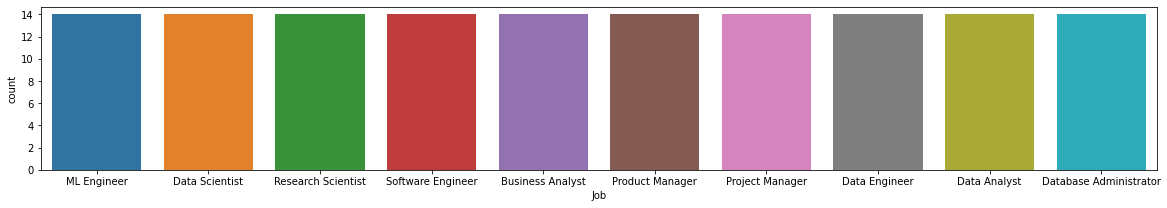

In [15]:
plt.figure(figsize = (20,3))
sns.countplot("Job", data = data)
plt.show()

# Analyzing Different Jobs

# Product manager

In [16]:
mask = data.Job == 'Product Manager'
prd_data = data[mask]
prd_data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
95,Product Manager,Switzerland,109000.0,0.886038,123019.554466,Very High
96,Product Manager,USA,109000.0,1.000000,109000.000000,Very High
98,Product Manager,Australia,112000.0,1.320835,84794.845685,Very High
99,Product Manager,UK,50000.0,0.745766,67045.158937,Very High
100,Product Manager,Canada,86000.0,1.272488,67584.134389,Very High


In [17]:
highest_pay = prd_data.country[prd_data.Avg_pay.sort_values(ascending = False).idxmax()]
print("Highest Paying country: ", highest_pay)

Highest Paying country:  South Korea


In [18]:
highest_usa_pay = data.country[prd_data.USA_avg_pay.idxmax()]
print("Country with Highest average annual pay in US($) dollars: ", highest_usa_pay)

Country with Highest average annual pay in US($) dollars:  Switzerland


In [19]:
overall_average_pay = np.round(prd_data.USA_avg_pay.mean(),2)
print("Average salary(USD) :", str(overall_average_pay) + " $")

Average salary(USD) : 66003.24 $


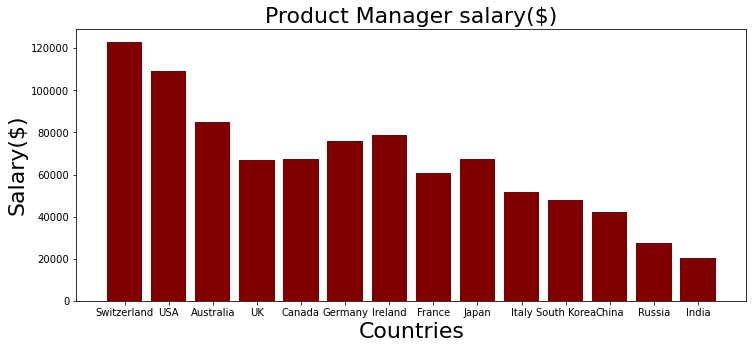

In [20]:
plt.figure(figsize = (12,5))
country = list(prd_data.country)
plt.title("Product Manager salary($)", fontsize = 22)
plt.bar(prd_data.country,prd_data.USA_avg_pay,color = 'maroon')
plt.xlabel("Countries", fontsize = 22)
plt.ylabel("Salary($)",fontsize = 22)
plt.show()

# Machine Learning Engineer

In [21]:
mask = data.Job == 'ML Engineer'
ml_data = data[mask]
ml_data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
0,ML Engineer,Switzerland,96000.0,0.886038,108347.497511,Very High
1,ML Engineer,USA,114000.0,1.000000,114000.000000,Very High
3,ML Engineer,Australia,110000.0,1.320835,83280.652012,Very High
4,ML Engineer,UK,50208.0,0.745766,67324.066798,Very High
5,ML Engineer,Canada,87000.0,1.272488,68369.996416,Very High


In [22]:
highest_pay = ml_data.country[ml_data.Avg_pay.sort_values(ascending = False).idxmax()]
print("Highest Paying country: ", highest_pay)

Highest Paying country:  South Korea


In [23]:
highest_usa_pay = data.country[ml_data.USA_avg_pay.idxmax()]
print("Country with Highest average annual pay in US($) dollars: ", highest_usa_pay)

Country with Highest average annual pay in US($) dollars:  USA


In [24]:
overall_average_pay = np.round(ml_data.USA_avg_pay.mean(),2)
print("Average salary(USD) :", str(overall_average_pay) + "$")

Average salary(USD) : 60620.68$


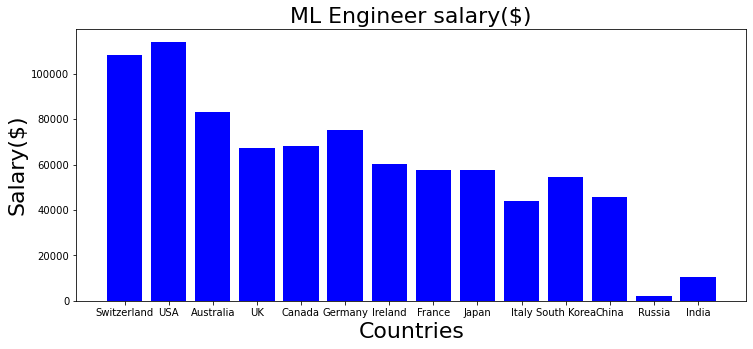

In [25]:
plt.figure(figsize = (12,5))
country = list(ml_data.country)
plt.title("ML Engineer salary($)", fontsize = 22)
plt.bar(ml_data.country,ml_data.USA_avg_pay,color = 'blue')
plt.xlabel("Countries", fontsize = 22)
plt.ylabel("Salary($)",fontsize = 22)
plt.show()


# Data Scientist

In [26]:
mask = data.Job == 'Data Scientist'
ds_data = data[mask]
ds_data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
19,Data Scientist,Switzerland,109000.0,0.886038,123019.554466,Very High
20,Data Scientist,USA,113000.0,1.000000,113000.000000,Very High
22,Data Scientist,Australia,110000.0,1.320835,83280.652012,Very High
23,Data Scientist,UK,45000.0,0.745766,60340.643044,Very High
24,Data Scientist,Canada,85000.0,1.272488,66798.272361,Very High


In [27]:
highest_pay = ds_data.country[ds_data.Avg_pay.sort_values(ascending = False).idxmax()]
print("Highest Paying country: ", highest_pay)

Highest Paying country:  South Korea


In [28]:
highest_usa_pay = ds_data.country[ds_data.USA_avg_pay.idxmax()]
print("Country with Highest pay in US dollars: ", highest_usa_pay)

Country with Highest pay in US dollars:  Switzerland


In [29]:
overall_average_pay = np.round(ds_data.USA_avg_pay.mean(),2)
print("Average salary(USD):", str(overall_average_pay) + "$")

Average salary(USD): 59896.67$


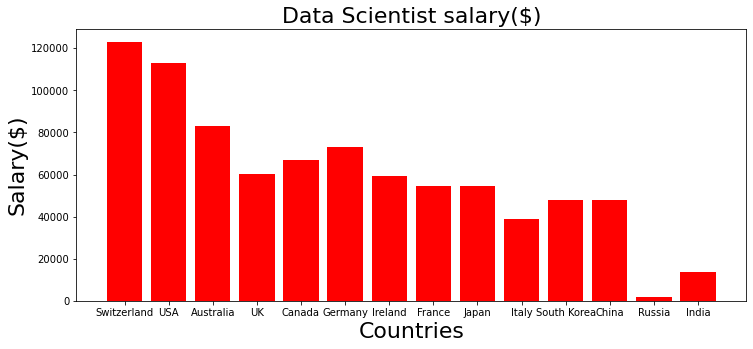

In [30]:
plt.figure(figsize = (12,5))
country = list(ds_data.country)
plt.title("Data Scientist salary($)", fontsize = 22)
plt.bar(country,ds_data.USA_avg_pay,color = 'Red')
plt.xlabel("Countries", fontsize = 22)
plt.ylabel("Salary($)",fontsize = 22)
plt.show()


# Software Engineer

In [31]:
mask = data.Job == 'Software Engineer'
swe_data = data[mask]
swe_data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
57,Software Engineer,Switzerland,99000.0,0.886038,111733.356809,Very High
58,Software Engineer,USA,92046.0,1.000000,92046.000000,Very High
60,Software Engineer,Australia,98000.0,1.320835,74195.489974,Very High
61,Software Engineer,UK,45000.0,0.745766,60340.643044,Very High
62,Software Engineer,Canada,83000.0,1.272488,65226.548305,Very High


In [32]:
highest_pay = swe_data.country[swe_data.Avg_pay.sort_values(ascending = False).idxmax()]
print("Highest Paying country: ", highest_pay)

Highest Paying country:  South Korea


In [33]:
highest_usa_pay = swe_data.country[swe_data.USA_avg_pay.idxmax()]
print("Country with Highest pay in US dollars: ", highest_usa_pay)

Country with Highest pay in US dollars:  Switzerland


In [34]:
overall_average_pay = np.round(swe_data.USA_avg_pay.mean(),2)
print("Average salary(USD):", str(overall_average_pay) + "$")

Average salary(USD): 57029.59$


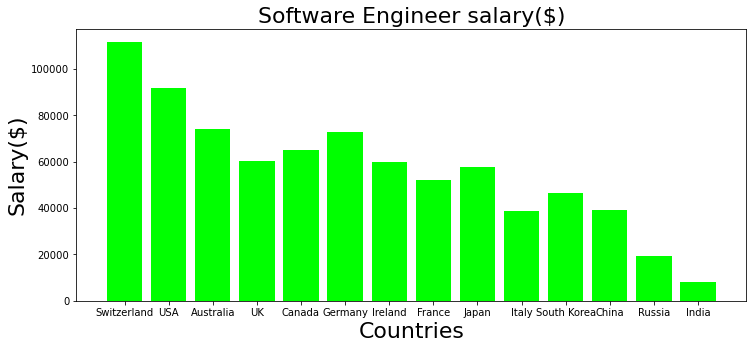

In [35]:
plt.figure(figsize = (12,5))
country = list(swe_data.country)
plt.title("Software Engineer salary($)", fontsize = 22)
plt.bar(country,swe_data.USA_avg_pay,color = 'lime')
plt.xlabel("Countries", fontsize = 22)
plt.ylabel("Salary($)",fontsize = 22)
plt.show()


# Data Analyst

In [36]:
mask = data.Job == 'Data Analyst'
da_data = data[mask]
da_data.head()

,Job,country,Avg_pay,Conversion Rate,USA_avg_pay,Confidence
171,Data Analyst,Switzerland,96000.0,0.886038,108347.497511,Very High
172,Data Analyst,USA,62453.0,1.000000,62453.000000,Very High
174,Data Analyst,Australia,83000.0,1.320835,62839.037427,Very High
175,Data Analyst,UK,30241.0,0.745766,40550.253028,Very High
176,Data Analyst,Canada,60000.0,1.272488,47151.721667,Very High


In [37]:
highest_pay = da_data.country[da_data.Avg_pay.sort_values(ascending = False).idxmax()]
print("Highest Paying country: ", highest_pay)

Highest Paying country:  South Korea


In [38]:
highest_usa_pay = da_data.country[da_data.USA_avg_pay.idxmax()]
print("Country with Highest pay in US dollars: ", highest_usa_pay)

Country with Highest pay in US dollars:  Switzerland


In [39]:
overall_average_pay = np.round(da_data.USA_avg_pay.mean(),2)
print("Average salary(USD):", str(overall_average_pay) + "$")

Average salary(USD): 46295.01$


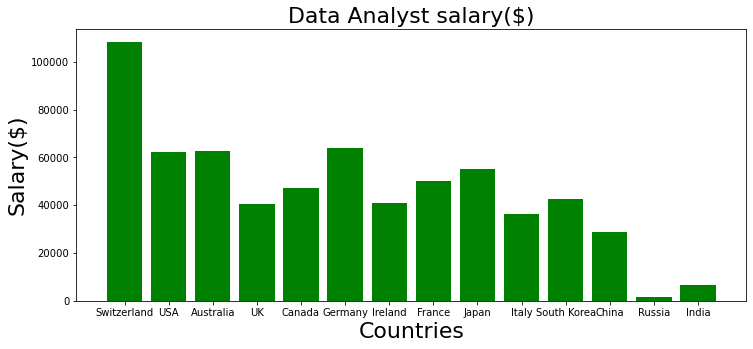

In [40]:
plt.figure(figsize = (12,5))
country = list(da_data.country)
plt.title("Data Analyst salary($)", fontsize = 22)
plt.bar(country,da_data.USA_avg_pay,color = 'green')
plt.xlabel("Countries", fontsize = 22)
plt.ylabel("Salary($)",fontsize = 22)
plt.show()


# All Jobs Comparision

In [41]:
highest_avg_paying_country = data.country[data.USA_avg_pay.idxmax()]
highest_paying_job = data.Job[data.USA_avg_pay.idxmax()]
print("Highest paying job: ",highest_paying_job)
print("Highest paying country: ", highest_avg_paying_country)

Highest paying job:  Data Scientist
Highest paying country:  Switzerland


In [42]:
lowest_avg_paying_country = data.country[data.USA_avg_pay.idxmin()]
lowest_paying_job = data.Job[data.USA_avg_pay.idxmin()]
print("Lowest paying job: ",lowest_paying_job)
print("Lowest paying country: ", lowest_avg_paying_country)

Lowest paying job:  Research Scientist
Lowest paying country:  Russia


# Countrywise job vs salary plot

In [43]:
selected_jobs = ['ML Engineer','Data Scientist','Software Engineer','Data Analyst','Research Scientist'
                ,'Data Engineer','Database Administrator','Project Manager',
                 'Business Analyst','Product Manager']
selected_countries = ['USA','UK','India','Australia','Canada','Germany','Russia','China','France','Switzerland',
                      'South Korea','Japan','Italy','Ireland']

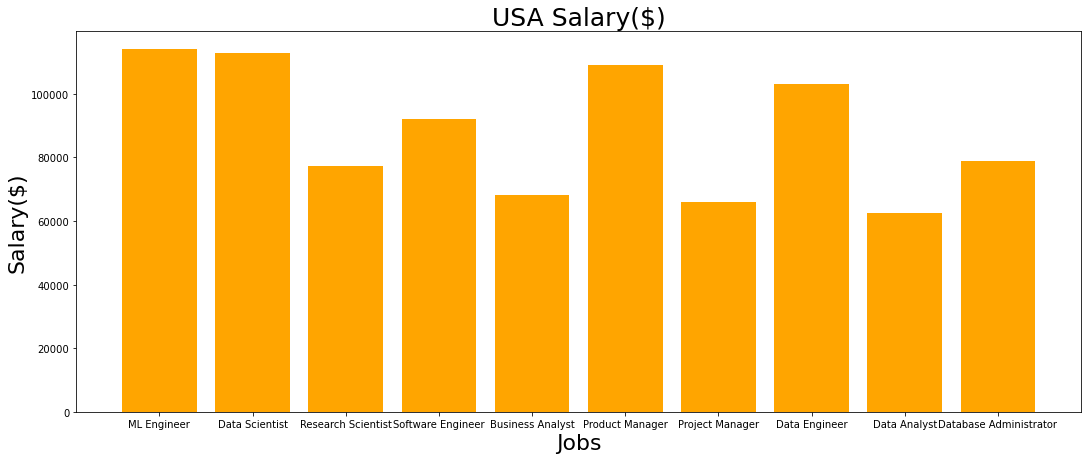

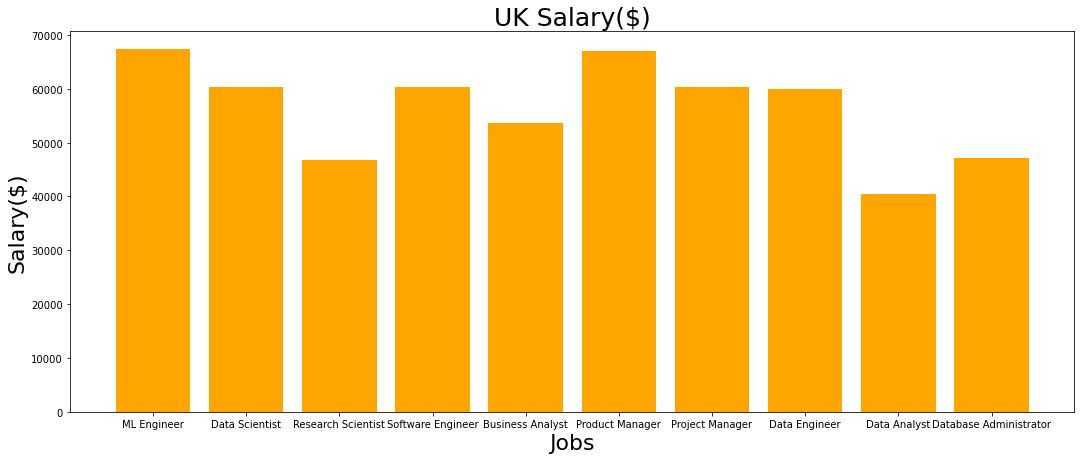

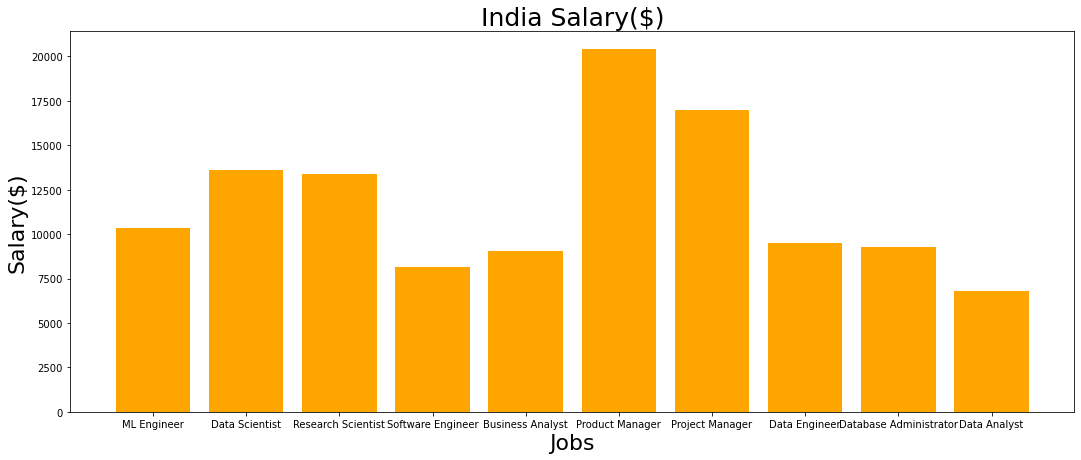

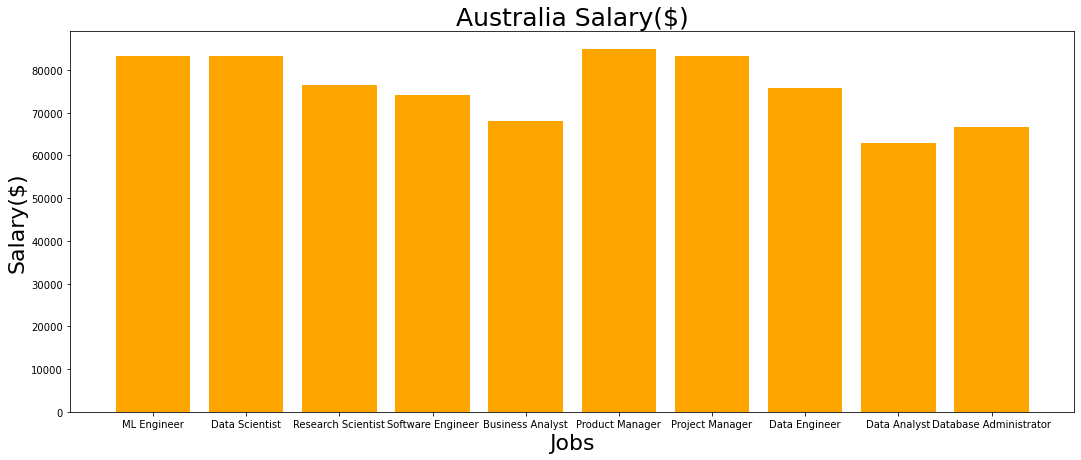

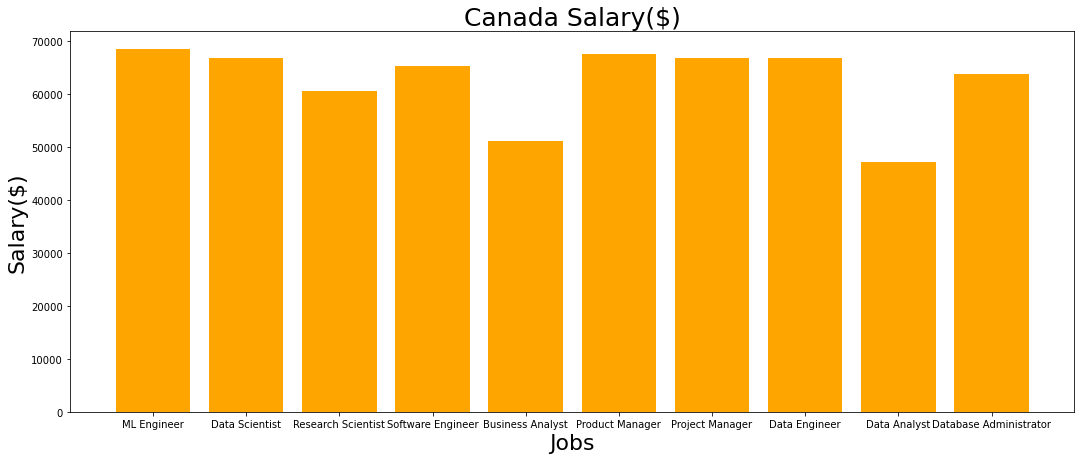

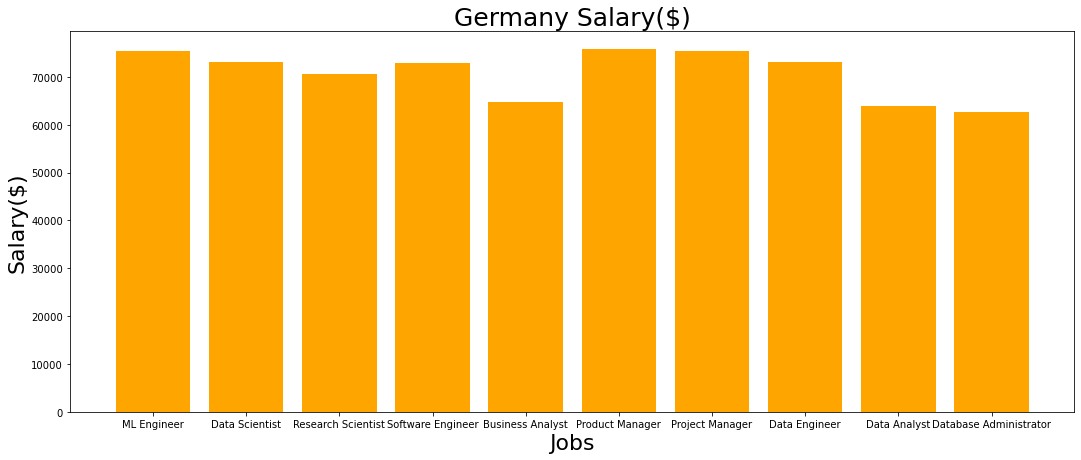

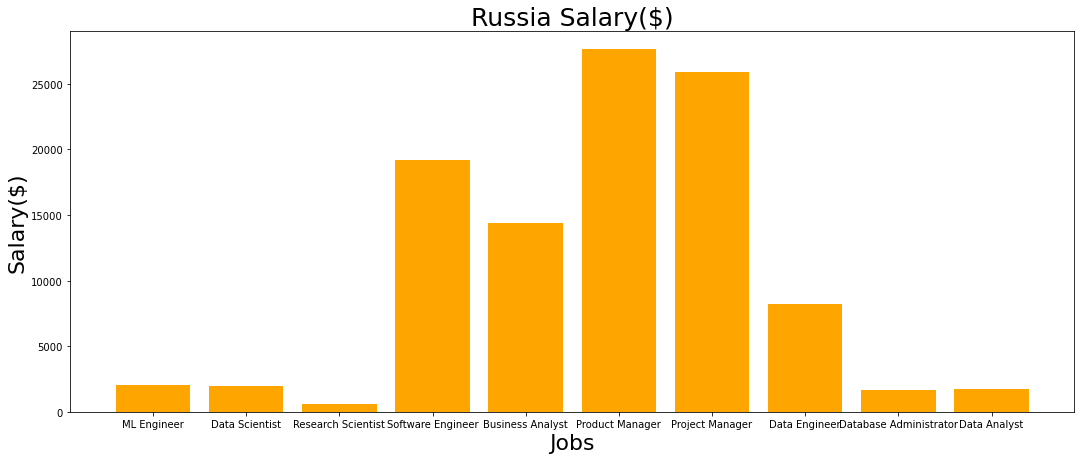

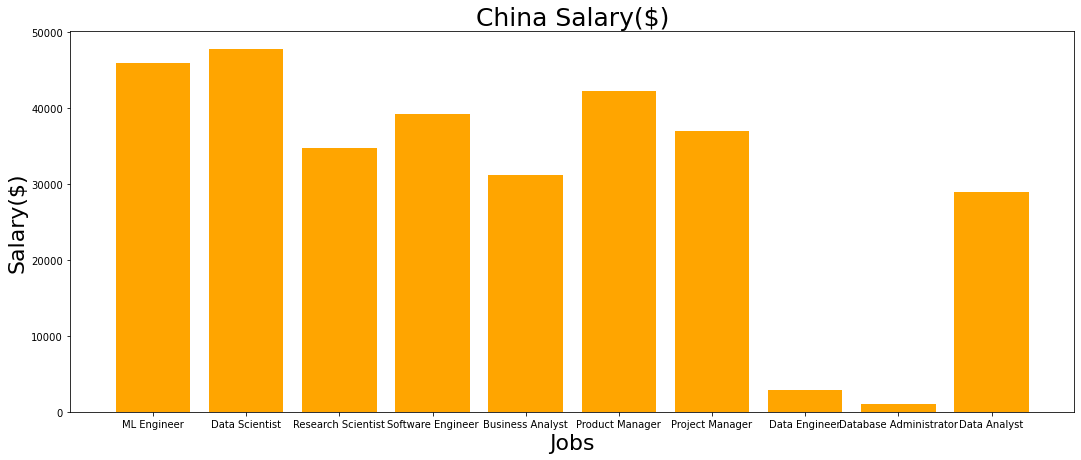

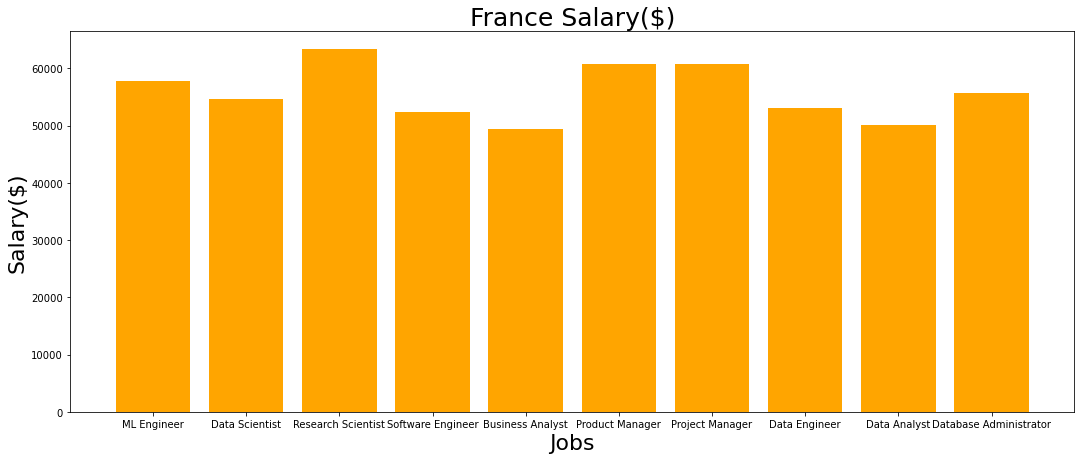

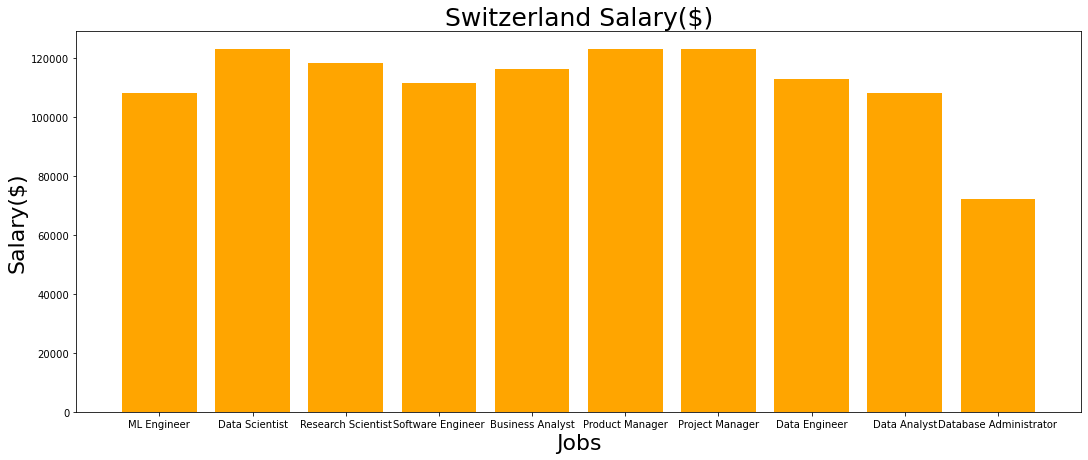

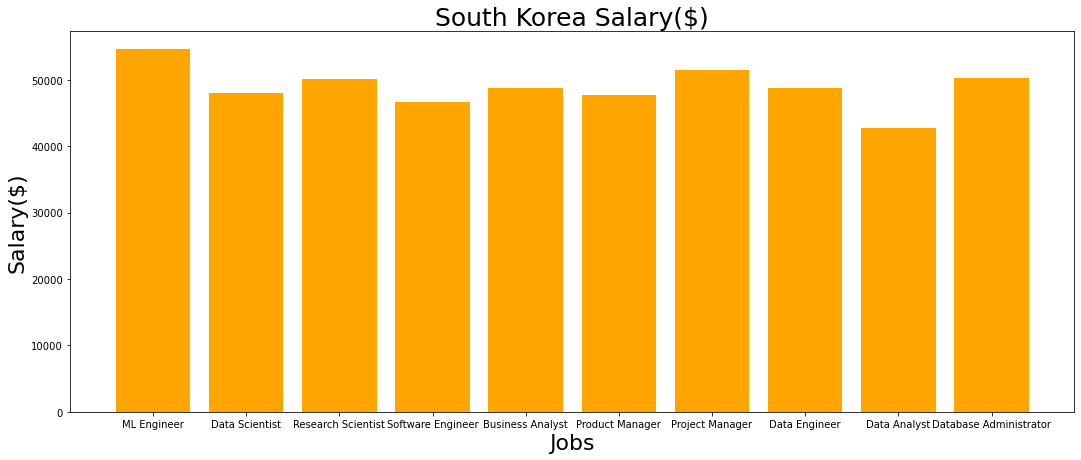

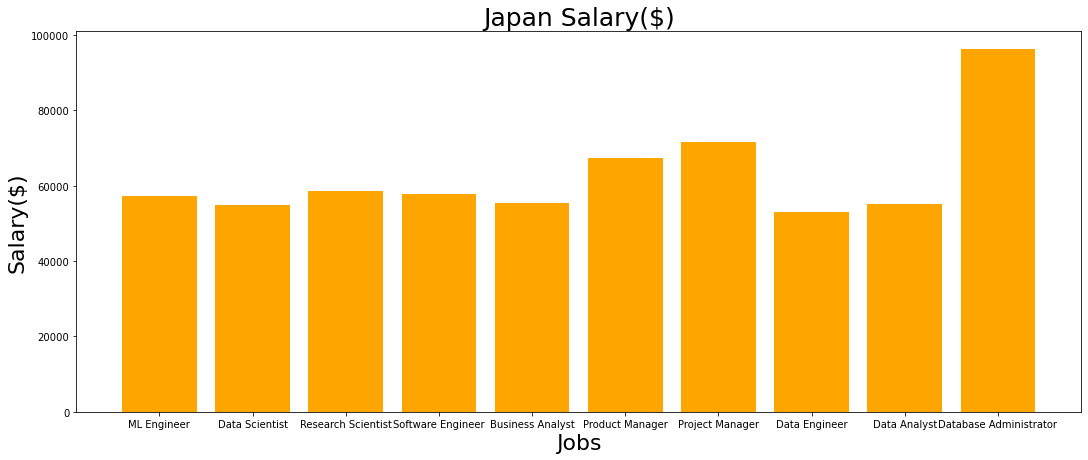

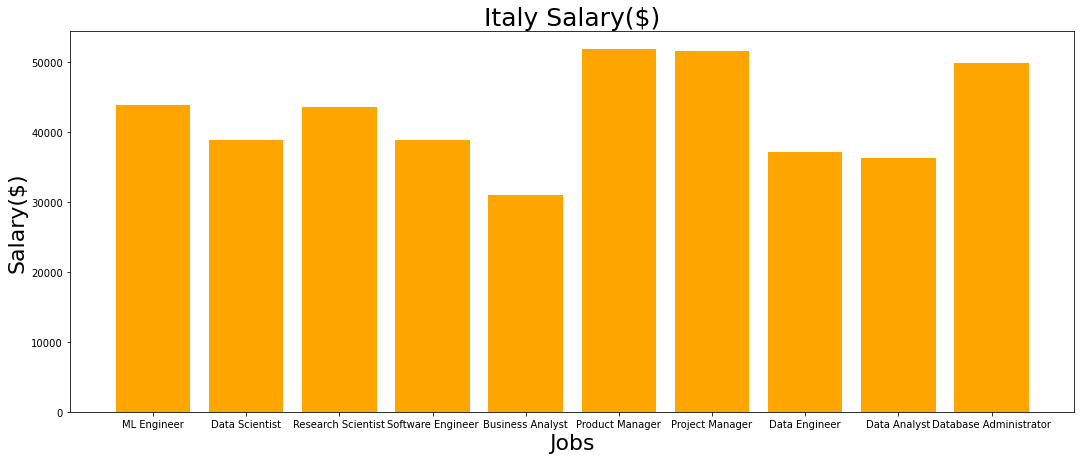

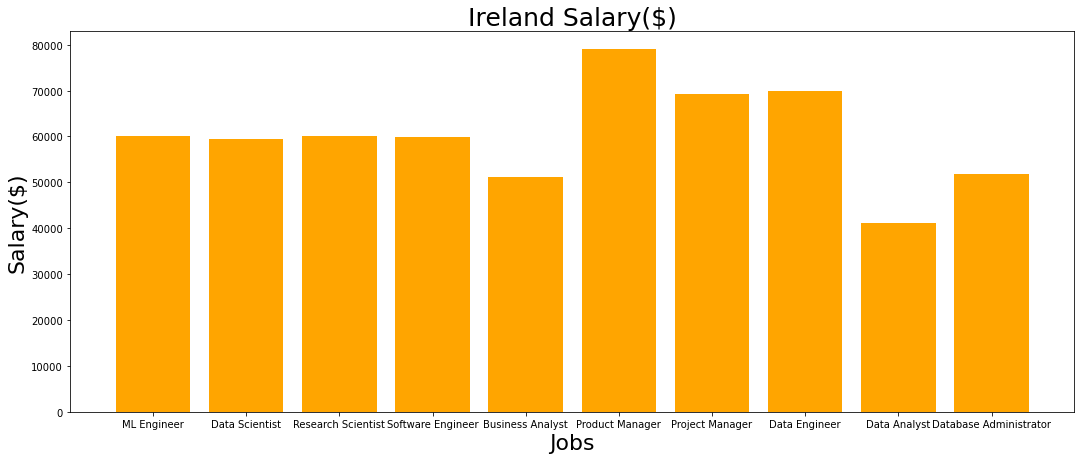

In [44]:
for i in range(len(selected_countries)):
    a = data[data['country'] == str(selected_countries[i])]
    plt.figure(figsize = (18,7))
    plt.title(str(selected_countries[i])+" Salary($)",fontsize = 25)
    plt.bar(a['Job'],a.USA_avg_pay, color = 'orange')
    plt.xlabel("Jobs", fontsize = 22)
    plt.ylabel("Salary($)",fontsize = 22)
 
    
    plt.show()

# highest paying  Jobs in each country

In [45]:
a = []
for i in selected_countries:
            highest_paying_job = data.Job[data[data['country']==str(i)].USA_avg_pay.idxmax()]
            salary = data.USA_avg_pay[data[data['country']==str(i)].USA_avg_pay.idxmax()]
            ls = [str(i),str(highest_paying_job),str(np.round(salary,2))]
            a.append(ls)
             

In [46]:
dataframe = pd.DataFrame(a, columns = ['Country','Highest Paying Job','Average Salary($)'])
dataframe
## this shows that ml engineer is highest paying job in many countries

,Country,Highest Paying Job,Average Salary($)
0,USA,ML Engineer,114000.0
1,UK,ML Engineer,67324.07
2,India,Product Manager,20394.52
3,Australia,Product Manager,84794.85
4,Canada,ML Engineer,68370.0
5,Germany,Product Manager,75743.74
6,Russia,Product Manager,27628.21
7,China,Data Scientist,47677.34
8,France,Research Scientist,63306.87
9,Switzerland,Data Scientist,123019.55


# Highest paying country for each jobs

In [47]:
j = []
for i in selected_jobs:
    country = data.country[data[data['Job'] ==str(i)].sort_values(ascending = False, by = "USA_avg_pay").USA_avg_pay.idxmax()]
    salary = data.USA_avg_pay[data[data['Job'] ==str(i)].sort_values(ascending = False, by = "USA_avg_pay").USA_avg_pay.idxmax()]
    j.append([str(i),str(country), str(np.round(salary,2))])
             

In [48]:
frame = pd.DataFrame(j, columns = ['Jobs','Country','Salary($)'])
frame.head(10)

,Jobs,Country,Salary($)
0,ML Engineer,USA,114000.0
1,Data Scientist,Switzerland,123019.55
2,Software Engineer,Switzerland,111733.36
3,Data Analyst,Switzerland,108347.5
4,Research Scientist,Switzerland,118505.08
5,Data Engineer,Switzerland,112861.98
6,Database Administrator,Japan,96188.87
7,Project Manager,Switzerland,123019.55
8,Business Analyst,Switzerland,116247.84
9,Product Manager,Switzerland,123019.55


## Average Salary for each job


In [49]:
ls = []
for i in selected_jobs:
    mask = data.Job == i 
    avg_pay = data[mask].USA_avg_pay.mean()
    ls.append([str(i),str(np.round(avg_pay,2))])

In [50]:
avg_pay_frame = pd.DataFrame(ls)
avg_pay_frame = avg_pay_frame.rename(columns = {0:"Jobs",1:"Avg Pay($)"})
avg_pay_frame.head(len(selected_jobs))

,Jobs,Avg Pay($)
0,ML Engineer,60620.68
1,Data Scientist,59896.67
2,Software Engineer,57029.59
3,Data Analyst,46295.01
4,Research Scientist,55320.08
5,Data Engineer,55295.22
6,Database Administrator,50488.46
7,Project Manager,61401.72
8,Business Analyst,50893.91
9,Product Manager,66003.24


### Here avg pay of Ml Engineer is more than Data Scientist.

## Average pay for in each country

In [53]:
ls = []
for i in selected_countries:
    mask = data.country == i 
    avg_pay_cou = data[mask].USA_avg_pay.mean()
    ls.append([str(i),str(np.round(avg_pay_cou,2))])
    
    

In [54]:
avg_pay_cou = pd.DataFrame(ls)
avg_pay_cou= avg_pay_cou.rename(columns = {0:"Country",1:"Avg Pay($)"})
avg_pay_cou.head(13)


,Country,Avg Pay($)
0,USA,88393.4
1,UK,56341.53
2,India,11752.68
3,Australia,75861.1
4,Canada,62397.45
5,Germany,70769.72
6,Russia,10326.87
7,China,31046.4
8,France,55776.65
9,Switzerland,111733.36


### Here we can see that average pay for all jobs is very high in switzerland

## Feel free to comment. Any Suggestion to improve this kernel is really appreciated.

# Thanks for your visit
